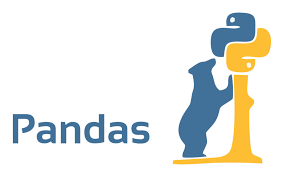

In [2]:
from IPython.display import Image 
Image('Pandas_imagen.png',width=500, height=500)

http://pandas.pydata.org

* The pandas library is a framework for data processing and analysis in Python
* This library provides quick and convenient graphing of data represented as pandas data structure(or NumPy arrays)


In [1]:
from pandas import Series
import pandas as pd
import numpy as np

# **Series**

## Arreglos unidimensionales etiquetados. Similares a los diccionarios 

In [2]:
serie = pd.Series([1,2,4,3,2,1])
serie

0    1
1    2
2    4
3    3
4    2
5    1
dtype: int64

In [4]:
serie.values, serie.index

(array([1, 2, 4, 3, 2, 1]), RangeIndex(start=0, stop=6, step=1))

In [8]:
serie2 = Series([1,3,5,7,11],index=['a','b','c','d','f'])
serie2

a     1
b     3
c     5
d     7
f    11
dtype: int64

## Acceder a un valor de la serie con un índice dado:

In [9]:
serie2['a']

1

## Acceder a una entrada de la serie:

In [6]:
serie2[['a']]

a    1
dtype: int64

## Acceder a un subconjunto de la serie definido por cierta condición:

In [8]:
serie2[serie2<5]

a    1
b    3
dtype: int64

In [9]:
serie2[serie2==5]

c    5
dtype: int64

In [10]:
serie2[serie2!=5]

a     1
b     3
d     7
f    11
dtype: int64

## Generar una nueva serie evaluando una función de numpy en los elementos de una serie dada:

In [10]:
serie3 = np.sin(serie2) 
serie3

a    0.841471
b    0.141120
c   -0.958924
d    0.656987
f   -0.999990
dtype: float64

In [12]:
'a' in serie3

True

In [46]:
'agua' in serie3

False

In [48]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')
population/area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

## .isnull() , .isnotnull() 

In [14]:
serie3.isnull()

a    False
b    False
c    False
d    False
f    False
dtype: bool

In [15]:
serie2.notnull()

a    True
b    True
c    True
d    True
f    True
dtype: bool

## Se pueden crear series a partir de diccionarios

In [17]:
dict={'q':3.,'qu':3.1,'que':3.14}
serie=pd.Series(dict)
serie

q      3.00
qu     3.10
que    3.14
dtype: float64

In [14]:
serie2, serie3 , serie 

(a     1
 b     3
 c     5
 d     7
 f    11
 dtype: int64, a    0.841471
 b    0.141120
 c   -0.958924
 d    0.656987
 f   -0.999990
 dtype: float64, 0    1
 1    2
 2    4
 3    3
 4    2
 5    1
 dtype: int64)

## Al sumar series si sus indices son iguales:

In [16]:
serie2+serie3

a     1.841471
b     3.141120
c     4.041076
d     7.656987
f    10.000010
dtype: float64

## Pero ...¿que pasa si sumamos dos series con índices diferentes?

In [18]:
s=serie3+serie
s

a     NaN
b     NaN
c     NaN
d     NaN
f     NaN
q     NaN
qu    NaN
que   NaN
dtype: float64

In [19]:
s.notnull()

a      False
b      False
c      False
d      False
f      False
q      False
qu     False
que    False
dtype: bool

# Se puede graficar de manera sencilla usando Series de Pandas:

In [15]:
#Construyendo el dominio
I=np.arange(0.,10.,0.1)
#Construyendo la imagen de la funcion seno como parte de una serie con indices iguales a los valores del codominio
serie5=Series(list(np.sin(I)) ,index=list(I))
serie5

0.0    0.000000
0.1    0.099833
0.2    0.198669
0.3    0.295520
0.4    0.389418
         ...   
9.5   -0.075151
9.6   -0.174327
9.7   -0.271761
9.8   -0.366479
9.9   -0.457536
Length: 100, dtype: float64

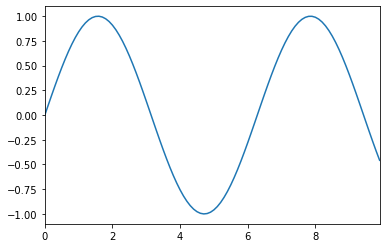

In [16]:
serie5.plot()

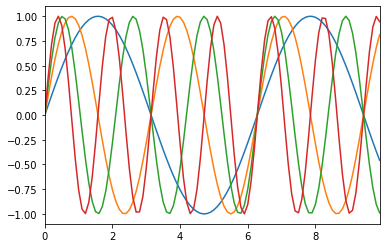

In [22]:
for ω in [1,2,3,4]:
    Series(list(np.sin(ω*I)) ,index=list(I)).plot()

# ESTADÍSTICA BÁSICA CON PANDAS

In [17]:
s = pd.Series([909976, 8615246, 2872086, 2273305])
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

Para asociar indices determinados a la serie se usa el siguiente metodo:

In [18]:
s.index=["Stockholm", "London", "Rome", "Paris"]
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
dtype: int64

lo mismo para asociar un nombre 

In [19]:
s.name="Population"
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

Otra forma de acceder a algun elemento de la serie es usando el indice del mismo, usando el siguiente metodo:

In [21]:
s.Paris

2273305

In [27]:
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

Y podemos hacer un histograma:

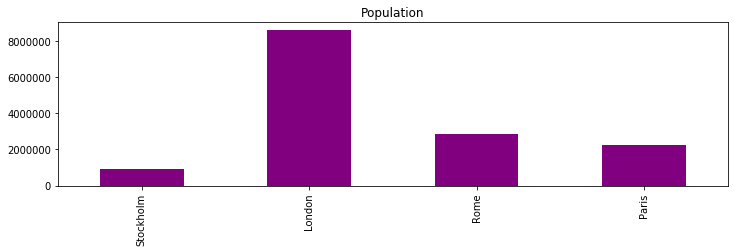

In [28]:
import matplotlib 
import matplotlib.pyplot as plt
#fig, axes = plt.subplots(1, figsize=(12, 3))
s.plot( kind='bar', title=s.name, color='purple')

Al indexar una serie con una lista da como resultado una nueva serie usando un subconjunto de la original

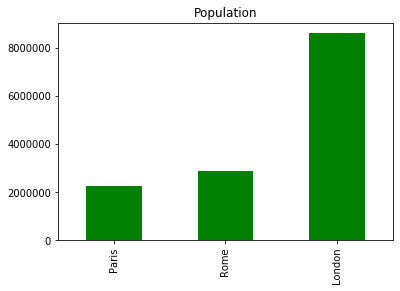

In [29]:
s[["Paris", "Rome","London"]].plot( kind='bar', title=s.name, color='g')

Se pueden calcular informacción estadistica sobre la muestra usando los siguientes metodos:
  * count
  * mean
  * median
  * std

In [30]:
print("Tamaño de la muestra:",s.count(),'\n',"Mediana:",s.median())
print("Promedio:",s.mean(),'\n',"Desviación Estándar:",s.std())
print("Máximo;", s.max(),'\n',"Mínimo", s.min())

Tamaño de la muestra: 4 
 Mediana: 2572695.5
Promedio: 3667653.25 
 Desviación Estándar: 3399048.5005155364
Máximo; 8615246 
 Mínimo 909976


# Quantiles :

Marcan un corte en la distribución de una variable aleatoria a partir del cual solo se muestra una fracción determinada de la muestra. 
En nuestro ejemplo la variable aleatoria es la poblacion en diferentes ciudades. El quantile con $q=0.25$ corresponde a un valor de la poblacion para la cual se toma un cuarto de la poblacion total.  

In [31]:
print("quantile 0.25", s.quantile(0.25))
print("quantile 0.5", s.quantile(0.5))
print("quantile 0.75", s.quantile(0.75))

quantile 0.25 1932472.75
quantile 0.5 2572695.5
quantile 0.75 4307876.0


Para mostrar la estadistica completa en un solo paso se usa el método describe:

In [32]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

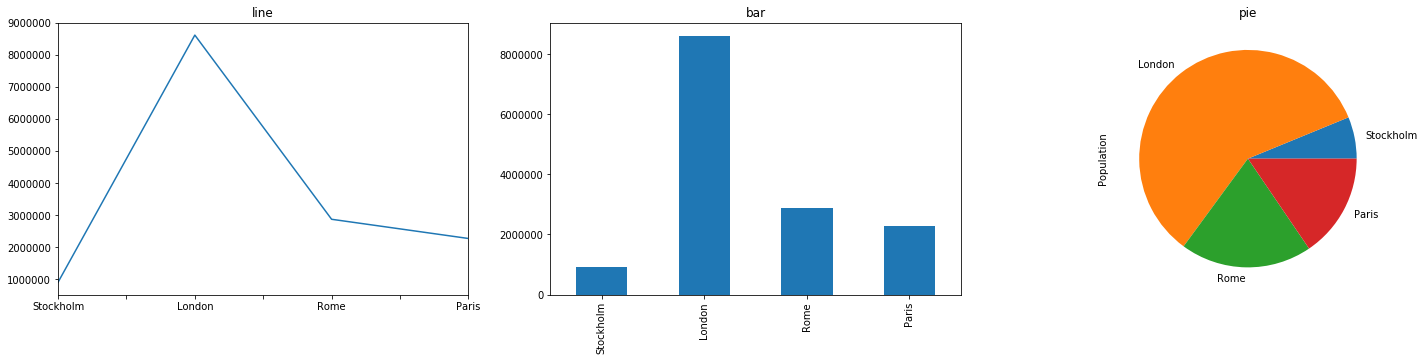

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='pie', title='pie')
